# Loan Approval / Data Cleaning

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../data/loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df["Dependents"].unique().tolist()

['0', '1', '2', '3+', nan]

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Checking Missing Data

In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df_temp = df.dropna()

## Gender

In [8]:
df["Gender"].fillna(method="ffill", inplace=True)
df.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

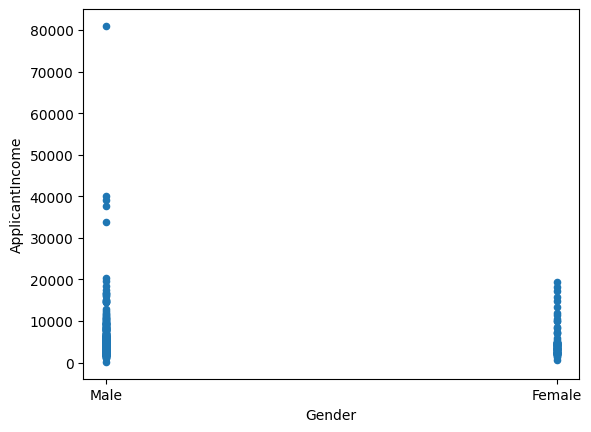

In [11]:
df_temp = df_temp.astype({"ApplicantIncome": "int"})

df_temp.plot.scatter("Gender", "ApplicantIncome")
plt.show()

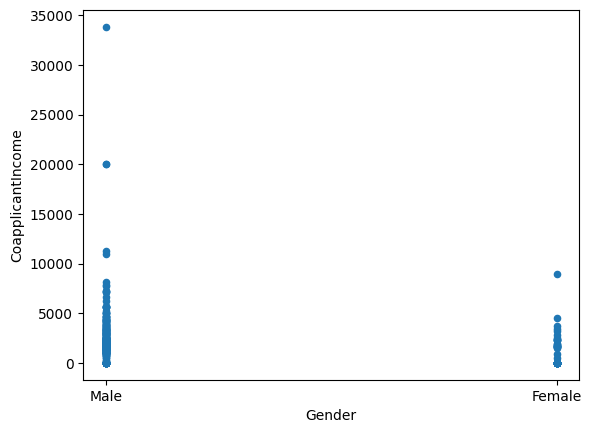

In [12]:
df_temp.plot.scatter("Gender", "CoapplicantIncome")
plt.show()

## Married

In [9]:
df[df["Married"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [10]:
df.loc[104, "Married"] = "Yes"
df.loc[228, "Married"] = "No"
df.loc[435, "Married"] = "No"

df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Dependents

In [11]:
df["Dependents"].unique().tolist()

['0', '1', '2', '3+', nan]

In [12]:
df.groupby(["Dependents"]).count()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Dependents,,,,,,,,,,,,
0,345,345,345,345,326,345,345,334,334,316,345,345
1,102,102,102,102,96,102,102,98,101,90,102,102
2,101,101,101,101,96,101,101,98,101,95,101,101
3+,51,51,51,51,49,51,51,49,50,48,51,51


In [13]:
df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,0.030224,-0.016942,0.047757,0.039442,0.036461,0.826514,0.427639,0.404596,0.061704,0.015365,0.069025,-0.011773
Gender,0.030224,1.000000,-0.369501,-0.161638,-0.049480,-0.022603,0.004659,-0.178449,0.030813,-0.032603,-0.011024,0.085967,0.012213
Married,-0.016942,-0.369501,1.000000,0.331397,0.015886,0.028307,-0.005580,0.238371,0.011616,0.009638,-0.031451,-0.004653,-0.086673
Dependents,0.047757,-0.161638,0.331397,1.000000,0.051414,0.048221,0.072894,-0.002040,0.054899,0.065055,0.029692,0.005011,-0.014263
Education,0.039442,-0.049480,0.015886,0.051414,1.000000,0.000820,0.073543,0.084689,-0.072995,0.047595,0.037534,-0.003592,0.085884
Self_Employed,0.036461,-0.022603,0.028307,0.048221,0.000820,1.000000,0.012799,-0.060386,0.004457,0.023490,0.055704,0.034247,0.011332
ApplicantIncome,0.826514,0.004659,-0.005580,0.072894,0.073543,0.012799,1.000000,0.378095,0.365594,0.006143,0.010961,0.078590,-0.018675
CoapplicantIncome,0.427639,-0.178449,0.238371,-0.002040,0.084689,-0.060386,0.378095,1.000000,0.203701,0.070696,-0.066805,0.018346,-0.084419
LoanAmount,0.404596,0.030813,0.011616,0.054899,-0.072995,0.004457,0.365594,0.203701,1.000000,0.048303,0.007100,0.114591,0.040160
Loan_Amount_Term,0.061704,-0.032603,0.009638,0.065055,0.047595,0.023490,0.006143,0.070696,0.048303,1.000000,-0.004415,-0.040700,0.073701


In [29]:
df.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


In [15]:
df.loc[(df["Dependents"].isna()) & (df["Married"] == 'No'), 'Dependents'] = '0'

In [16]:
df["Dependents"].fillna(method="ffill", inplace=True)

In [17]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

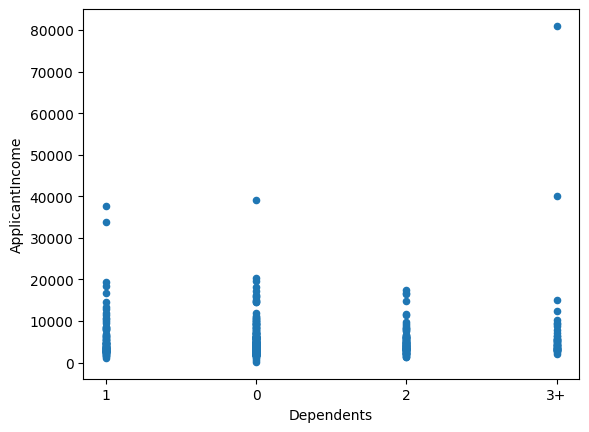

In [13]:
df_temp.plot.scatter("Dependents", "ApplicantIncome")
plt.show()

## Self-Employed

In [18]:
df["Self_Employed"].unique().tolist()

['No', 'Yes', nan]

In [19]:
df.groupby(["Self_Employed"]).count()

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Self_Employed,,,,,,,,,,,,
No,500,500,500,500,500,500,500,482,489,463,500,500
Yes,82,82,82,82,82,82,82,79,80,75,82,82


In [20]:
df["Self_Employed"].fillna(method="ffill", inplace=True)

In [21]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## LoanAmount

In [22]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [23]:
df.median()

C:\Users\Kaveh\AppData\Local\Temp\ipykernel_16108\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [24]:
df.loc[df["LoanAmount"].isna(), "LoanAmount"] = 128
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,145.752443,342.00000,0.842199
std,6109.041673,2926.248369,84.107233,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


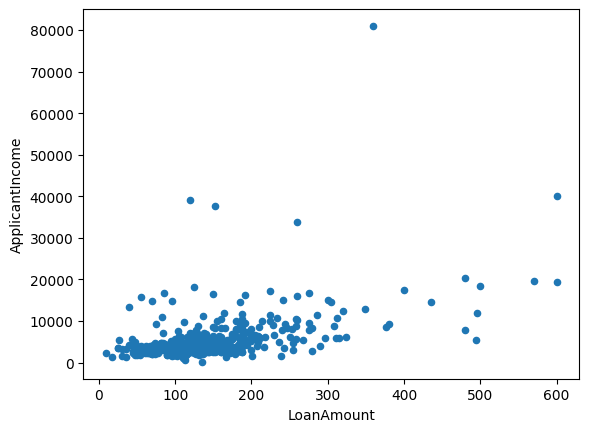

In [14]:
df_temp.plot.scatter("LoanAmount", "ApplicantIncome")
plt.show()

In [16]:
df["Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df_temp["Income"] = df_temp["ApplicantIncome"] + df_temp["CoapplicantIncome"]
df_temp = df_temp.astype({"Income": "int"})
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int32  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
 13  Income             480 non-null    int32  
dtypes: float64(4), int32(2), object(8)
memory usage: 52.5+ KB


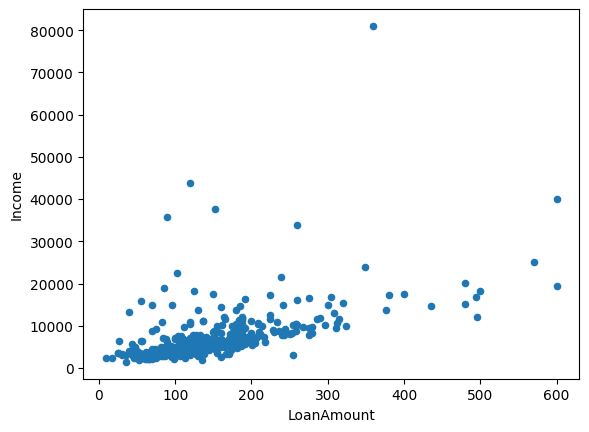

In [17]:
df_temp.plot.scatter("LoanAmount", "Income")
plt.show()

## Loan_Amount_Term

In [26]:
df.loc[df["Loan_Amount_Term"].isna(), "Loan_Amount_Term"] = 360
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
Income                0
dtype: int64

## Credit History

In [27]:
df.loc[df["Credit_History"].isna(), "Credit_History"] = 1
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Linear Model to fill Loan Amount

In [20]:
import statsmodels.api as sm

# defining the variables
x = df_temp['Income'].tolist()
y = df_temp['LoanAmount'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
model = sm.OLS(y, x).fit()
 
# printing the summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           6.01e-40
Time:                        09:27:25   Log-Likelihood:                -2699.1
No. Observations:                 480   AIC:                             5402.
Df Residuals:                     478   BIC:                             5410.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.8549      4.701     19.751      0.0

In [22]:
incomes = df[df["LoanAmount"].isna()]["Income"].values
incomes

array([ 5849.,  4342.,  4945.,  2395.,  6782., 13650.,  8235.,  7451.,
        5505.,  3992., 20667.,  2000.,  5191.,  1830.,  6146., 10047.,
        3338.,  4550.,  6767.,  6633.,  4867.,  6200.])

In [23]:
x = sm.add_constant(incomes)

predictions = model.predict(x)
predictions = predictions.astype("int")
predictions

array([136, 125, 129, 110, 143, 194, 154, 148, 133, 122, 247, 107, 131,
       106, 138, 167, 117, 126, 143, 142, 129, 139])

In [24]:
df.loc[df["LoanAmount"].isna(), "LoanAmount"] = predictions

In [25]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Income                0
dtype: int64

## Saving Clean Dataset

In [28]:
df.to_csv("../data/processed/loan-clean.csv", index=False)